## DSC650-T301 Big Data (2235-1)
## 4/13/2023
## Joshua Greenert

## Assignment 5.1

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Use function on train and test sets.
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
# Vectorize the labels too
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
# Validate your approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5893 - accuracy: 0.7003 - val_loss: 0.4948 - val_accuracy: 0.8133
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4056 - accuracy: 0.8862 - val_loss: 0.3954 - val_accuracy: 0.8480
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2911 - accuracy: 0.9211 - val_loss: 0.3238 - val_accuracy: 0.8808
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2247 - accuracy: 0.9368 - val_loss: 0.2852 - val_accuracy: 0.8918
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1822 - accuracy: 0.9482 - val_loss: 0.2774 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1511 - accuracy: 0.9567 - val_loss: 0.3054 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1275 - accuracy: 0.9639 - val_loss: 0.2911 - val_accuracy: 0.8865
Epoch 8/20
30

In [6]:
# Set the history dict
history_dict = history.history

In [7]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

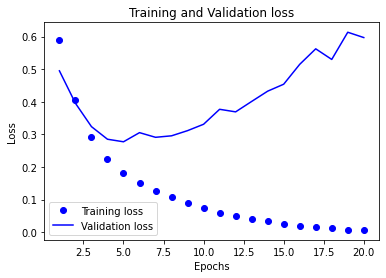

In [10]:
# Plot the training and validation loss.
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

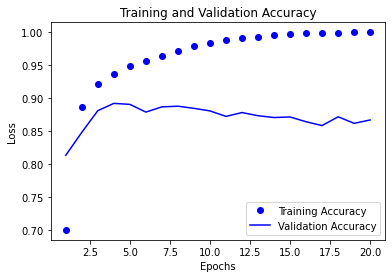

In [13]:
# Plot the train data and validation accuracy.
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
# Retrain a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.5172 - accuracy: 0.7913
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2995 - accuracy: 0.9045
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2185 - accuracy: 0.9255
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2889 - accuracy: 0.8842


In [15]:
results

[0.2888578176498413, 0.8841999769210815]

In [16]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.23635882],
       [0.99995863],
       [0.966947  ],
       ...,
       [0.12932311],
       [0.13387689],
       [0.73368824]], dtype=float32)

## Assignment 5.2

In [50]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [51]:
len(train_data)

8982

In [52]:
len(test_data)

2246

In [53]:
# Decode the newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [54]:
# Preparing the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [55]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [56]:
# Model definition
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

In [57]:
# set aside validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [58]:
# Train the model
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 38ms/step - loss: 2.5385 - acc: 0.5318 - val_loss: 1.7057 - val_acc: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.3986 - acc: 0.7065 - val_loss: 1.3015 - val_acc: 0.7060
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.0482 - acc: 0.7757 - val_loss: 1.1263 - val_acc: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.8267 - acc: 0.8227 - val_loss: 1.0292 - val_acc: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6604 - acc: 0.8598 - val_loss: 0.9673 - val_acc: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5301 - acc: 0.8909 - val_loss: 0.9404 - val_acc: 0.7940
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.4254 - acc: 0.9124 - val_loss: 0.9175 - val_acc: 0.8070
Epoch 8/20
16/16 [==============================] - 0s 23ms/step - loss: 0.3462 - a

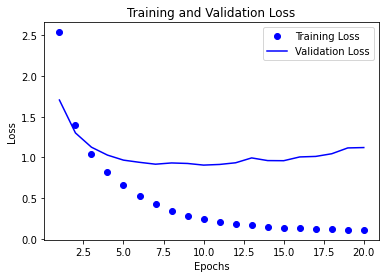

In [59]:
# Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

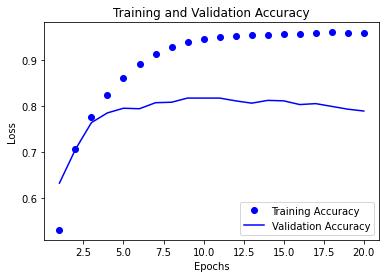

In [60]:
# plotting the training and validation accuracy
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [61]:
# Train a new model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 35ms/step - loss: 2.8303 - acc: 0.4891 - val_loss: 1.8465 - val_acc: 0.6390
Epoch 2/9
16/16 [==============================] - 0s 21ms/step - loss: 1.4929 - acc: 0.6937 - val_loss: 1.3620 - val_acc: 0.6840
Epoch 3/9
16/16 [==============================] - 0s 21ms/step - loss: 1.1015 - acc: 0.7661 - val_loss: 1.1682 - val_acc: 0.7430
Epoch 4/9
16/16 [==============================] - 0s 21ms/step - loss: 0.8769 - acc: 0.8168 - val_loss: 1.0641 - val_acc: 0.7730
Epoch 5/9
16/16 [==============================] - 0s 21ms/step - loss: 0.7030 - acc: 0.8507 - val_loss: 0.9928 - val_acc: 0.8010
Epoch 6/9
16/16 [==============================] - 0s 21ms/step - loss: 0.5689 - acc: 0.8777 - val_loss: 0.9680 - val_acc: 0.7950
Epoch 7/9
16/16 [==============================] - 0s 21ms/step - loss: 0.4552 - acc: 0.9037 - val_loss: 0.9289 - val_acc: 0.8070
Epoch 8/9
16/16 [==============================] - 0s 21ms/step - loss: 0.3721 - acc: 0.92

In [62]:
results

[0.9606949687004089, 0.7853962779045105]

In [63]:
# test against random
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1856634016028495

In [64]:
# Generating predictions
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [65]:
np.sum(predictions[0])

0.99999994

In [66]:
np.argmax(predictions[0])

3

In [67]:
# A model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 13ms/step - loss: 2.5799 - accuracy: 0.4826 - val_loss: 1.8618 - val_accuracy: 0.5750
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.5852 - accuracy: 0.6143 - val_loss: 1.5305 - val_accuracy: 0.6150
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.3116 - accuracy: 0.6460 - val_loss: 1.4312 - val_accuracy: 0.6420
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1422 - accuracy: 0.6958 - val_loss: 1.3817 - val_accuracy: 0.6740
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0150 - accuracy: 0.7397 - val_loss: 1.3496 - val_accuracy: 0.6920
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9157 - accuracy: 0.7588 - val_loss: 1.3517 - val_accuracy: 0.7070
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.8380 - accuracy: 0.7737 - val_loss: 1.3629 - val_accuracy: 0.7010
Epoch 8/20
63/63 

## Assignment 5.3

In [68]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [69]:
train_data.shape

(404, 13)

In [70]:
test_data.shape

(102, 13)

In [71]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [72]:
# Prepare the data
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [73]:
# model definition
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

In [74]:
# K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis = 0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [75]:
all_scores

[1.9039514064788818, 2.5413460731506348, 2.7545762062072754, 2.315114736557007]

In [76]:
np.mean(all_scores)

2.3787471055984497

In [78]:
# Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data, val_targets),
                        epochs = num_epochs, batch_size = 1, verbose = 0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [79]:
# Building a history of successive k-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

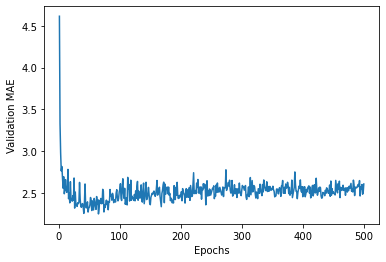

In [80]:
# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

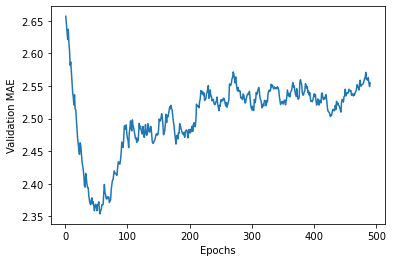

In [81]:
# Plotting validation scores, excluding first 10 data points.
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [83]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 17.0257 - mae: 2.7760


In [84]:
test_mae_score

2.775958299636841